In [122]:
# Should Make School Bring 'VR' Back As One of the Tracks? (NPS Project by Zain Raza)

In [123]:
# let's get to the code!
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('Student-Feedback-Surveys-Superview.csv')
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [125]:
# Q1: In this survey, how many of the responses came from VR students? 
vr_students = df[df['Track'] == 'VR']
num_vr = len(vr_students)
num_vr

60

In [135]:
# But wait! This does not mean there were 60 different VR students in the program!
# Q2: Assuming that students were not allowed to change concentration, 
# and that students were not allowed to enter Make School mid-program, what is the number of distinct students in VR?

# let's create a distribution of students by week and by track, so we can get an idea of how many students there were
# in each track
# vr_students['Week'].hist(bins=8)

table = pd.crosstab(df['Track'], df['Week'])
table

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183,176,142,105,101,88,72,4
"Apps, Explorer",42,40,38,34,31,23,16,0
Games,35,29,36,33,31,21,19,4
"Games, Explorer",6,6,7,7,6,6,5,0
VR,10,10,10,10,7,5,7,1


In [143]:
dict( pd.crosstab(df['Week'], df['Track']))['VR'].values

array([10, 10, 10, 10,  7,  5,  7,  1])

In [137]:
# Let's assume the max in row represents the number of students in that track
tracks_and_students = {
    'Apps': max(table['Apps'])
}
df['Track']

KeyError: 'Track'

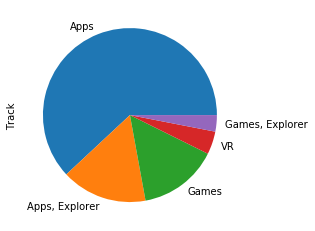

In [127]:
# By the way, how many Tracks were offered at Make School in 2017?
# tracks = df['Track']
# tracks.describe()
# df['Track'].value_counts().plot(kind='pie')

In [128]:
# What percentage of Make School students chose the VR track?
# So far, we know there were 10 VR students. What about the other tracks?

# let's make an array to store the numbers of students in each track, starting with VR
num_vr = 10
students_per_track = {
    "VR": [num_vr]
}

In [129]:
# while we're at it, we can make a function to abstract the process of finding the unique students per track!
def find_unique_students(track_name, week_num):
    """Add a key value pair of the number of responses by students of a given track, during the week when there was the most responses
       from students in that track.
    
    """
    num_students = df[(df['Track'] == track_name) & (df['Week'] == week_num)]
    students_per_track[track_name] = len(num_students)

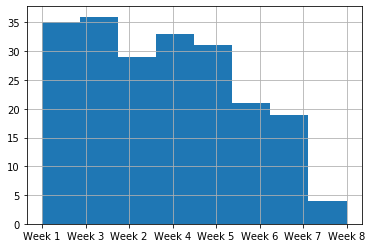

In [101]:
# Students in the Games Track:
games_students = df[df['Track'] == 'Games']
games_students['Week'].hist(bins=8)

In [102]:
# okay, so the most responses from Games students came in Week 3. How many were there that week?
games_students_week_3 = df[(df['Track'] == 'Games') & (df['Week'] == 'Week 3')]
num_games_students = len(games_students_week_3)
# let's add this data to our list (to make finding the percentage easier to find at the end)!
find_unique_students('Games', 'Week 3')
num_games_students # display the number, to prove it's not NaN

36

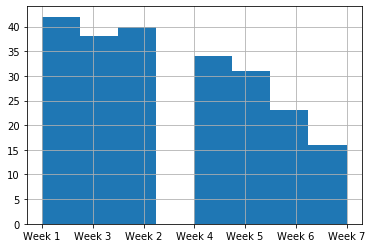

In [103]:
# Students in the Apps/Explorer Track
apps_explorer_students = df[df['Track'] == 'Apps, Explorer']
apps_explorer_students['Week'].hist(bins=8)

In [109]:
# Number or Unique Apps Students:
apps_explorer_students_week_1 = df[(df['Track'] == 'Apps, Explorer') & (df['Week'] == 'Week 1')]
num_apps_explorer_students = len(apps_explorer_students_week_1)
# let's add this data to our list (to make finding the percentage easier to find at the end)!
find_unique_students('Apps, Explorer', 'Week 1')
num_apps_students

42

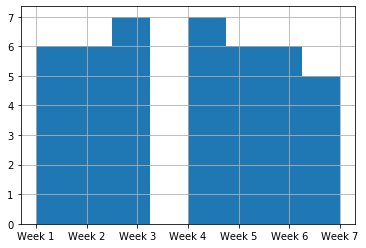

In [110]:
# Students in the Games/Explorer Track:
games_explorers_students = df[df['Track'] == 'Games, Explorer']
games_explorers_students['Week'].hist(bins=8)
# from the histogram, we can already tell the number of unique students exactly
num_games_explorer_students = 7
students_per_track['Games, Explorer'] = [num_games_explorer_students]

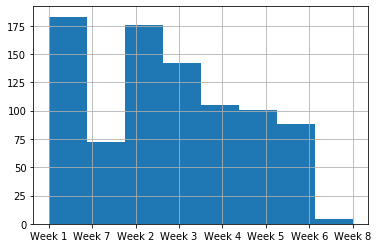

In [111]:
# Students in the Apps Track:
apps_explorers_students = df[df['Track'] == 'Apps']
apps_explorers_students['Week'].hist(bins=8)

In [112]:
# same execution, let's just add this data (that leads to the unique number of students) to our list!
find_unique_students('Apps', 'Week 1')

In [113]:
# Now, we know the numbers of all the students per track!
students_per_track

{'VR': [10],
 'Games': 36,
 'Apps, Explorer': 42,
 'Games, Explorer': [7],
 'Apps': 183}

In [93]:
# we can turn that into a Pandas Dataframe, and from there make a pie chart!
tracks_table = pd.DataFrame(data=students_per_track, index=range(len(students_per_track)))
tracks_table.head(1)

,VR,Games,"Apps, Explorer","Games, Explorer",Apps
0,10,36,42,7,183


In [65]:
# Q3: How large was this group compared to the entire program? (bar and pie graph)(number)
tracks = df['Track']
tracks.describe()

count     1406
unique       5
top       Apps
freq       871
Name: Track, dtype: object

In [34]:
# bar graph of students by track


In [35]:
# Pie Chart of Students By Track


In [36]:
# Q4: As a group, what was the average NPS score of students in the VR track?
# How did it change over the duration of the 2017 program? (line graph)


In [11]:
# Was this higher or lower compared to students in other tracks? Compared to all Make School students?

In [8]:
# Q5: On average, how well did VR students handle the pacing of Make School?
# How did this sentiment change over the course of the 2017 program? (line graph)

In [9]:
# Q6: Where did the students in the VR track come from? (bar and pie graph)